In [1]:
import numpy as np 
import pandas as pd 
import os 
from scipy.stats.mstats import gmean
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_excel('zscores_contains_imputed.xlsx')
data.set_index("fips", inplace=True)
data

,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,Nutritional Quality,Infrastructure,Index,Accessibility_PCA,Inequality_PCA,Affordability_PCA,Nutritional Quality_PCA,Infrastructure_PCA,Index_PCA,Index_gmean
fips,,,,,,,,,,,,,,,,,,,,,
1001,0.284434,0.115772,-0.483454,-0.685472,-0.412146,-0.310487,-0.303583,-0.699098,1.059607,0.837942,...,0.166016,-0.641247,-0.147414,0.364456,-0.977969,-0.989813,1.278376,-1.384505,-0.278303,-0.301314
1003,0.782827,0.089999,-0.296934,-0.541633,-0.408540,-0.310487,-0.154869,-0.080317,1.694824,1.895617,...,0.826707,-0.907219,0.059999,-0.446037,-0.700775,-1.229663,2.661248,-2.069146,-1.256732,-0.674750
1005,-1.341900,-0.463417,-0.273214,-0.999153,1.012212,-0.310487,-0.154869,-2.044276,-0.835953,0.031460,...,-0.394404,-0.569932,-0.741165,2.297380,-1.757140,1.852305,-0.355525,-1.279735,3.076306,1.030973
1007,0.494284,-0.219007,-0.483454,0.898283,-0.146213,-0.310487,0.439987,-0.860520,-0.630195,-0.909985,...,-0.319938,-0.617925,-0.355017,0.340634,-1.832592,-0.319715,-1.415278,-1.323421,1.342842,-0.429224
1009,0.809058,0.417039,-0.072330,0.604481,-0.419092,-0.310487,0.439987,-0.376256,0.838562,1.160320,...,0.456323,-0.266906,0.135020,-0.360582,-0.028545,-0.973466,1.083576,-0.651251,-0.951335,-0.414232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.100816,0.324527,-0.483454,-0.375249,-0.128120,-0.310487,0.439987,0.484658,-1.003946,-0.628180,...,-0.424104,-0.495478,-0.022813,-0.636326,0.807240,-0.453993,-0.955725,-1.265299,0.330357,-0.601891
56039,0.441822,-0.734317,-0.114794,-0.902964,0.705072,-0.310487,0.439987,1.103440,1.570932,2.503653,...,1.259322,-0.723853,0.486960,-0.837862,-0.297662,-2.385016,3.473813,-1.833448,-2.580993,-0.986259
56041,0.520515,-0.103865,0.036146,-0.766314,0.391330,-0.310487,0.439987,0.134912,0.264919,-0.869398,...,-0.185377,-0.386187,0.172012,-0.047449,1.805705,-0.692906,-0.106918,-1.183668,0.064476,-0.248710


In [8]:
subdata = data.iloc[:, :-13]
subdata

,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,SNAP Inequality,LAccess Inequality,Gini
fips,,,,,,,,,,,,,,,,,,,,,
1001,0.284434,0.115772,-0.483454,-0.685472,-0.412146,-0.310487,-0.303583,-0.699098,1.059607,0.837942,...,-0.189440,-0.987803,-0.697650,-0.822044,-0.215283,0.492252,1.053144,-1.600371,0.205242,-0.120125
1003,0.782827,0.089999,-0.296934,-0.541633,-0.408540,-0.310487,-0.154869,-0.080317,1.694824,1.895617,...,-0.662309,-1.092260,-1.002108,-1.456453,-0.688340,0.440749,0.971660,-0.566418,-0.315282,-0.312146
1005,-1.341900,-0.463417,-0.273214,-0.999153,1.012212,-0.310487,-0.154869,-2.044276,-0.835953,0.031460,...,-0.080807,-0.883346,-0.712148,-0.822044,-0.158909,-1.329029,-0.413571,-0.933907,-0.525197,-1.558972
1007,0.494284,-0.219007,-0.483454,0.898283,-0.146213,-0.310487,0.439987,-0.860520,-0.630195,-0.909985,...,-0.159619,-0.987803,-0.625160,-0.822044,-0.171164,-0.686552,0.890176,-1.905573,-0.974266,-0.206929
1009,0.809058,0.417039,-0.072330,0.604481,-0.419092,-0.310487,0.439987,-0.376256,0.838562,1.160320,...,0.034215,-0.674431,-0.393191,-0.187636,-0.006943,-0.133516,1.134628,0.841251,-0.772929,-0.285842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.100816,0.324527,-0.483454,-0.375249,-0.128120,-0.310487,0.439987,0.484658,-1.003946,-0.628180,...,-1.201210,-0.778888,-1.147088,1.081180,-1.149140,1.031724,-0.495055,-0.167786,1.065692,0.629549
56039,0.441822,-0.734317,-0.114794,-0.902964,0.705072,-0.310487,0.439987,1.103440,1.570932,2.503653,...,-1.341793,-0.674431,-1.277570,-0.187636,-1.364834,2.868535,0.727207,1.208740,0.394672,-2.219211
56041,0.520515,-0.103865,0.036146,-0.766314,0.391330,-0.310487,0.439987,0.134912,0.264919,-0.869398,...,-1.203340,-0.674431,-1.205080,1.081180,-1.168749,0.735876,-0.169119,0.778965,0.034659,2.255157


In [10]:
#calculate the correlation matrix 
correlation_matrix=subdata.corr()

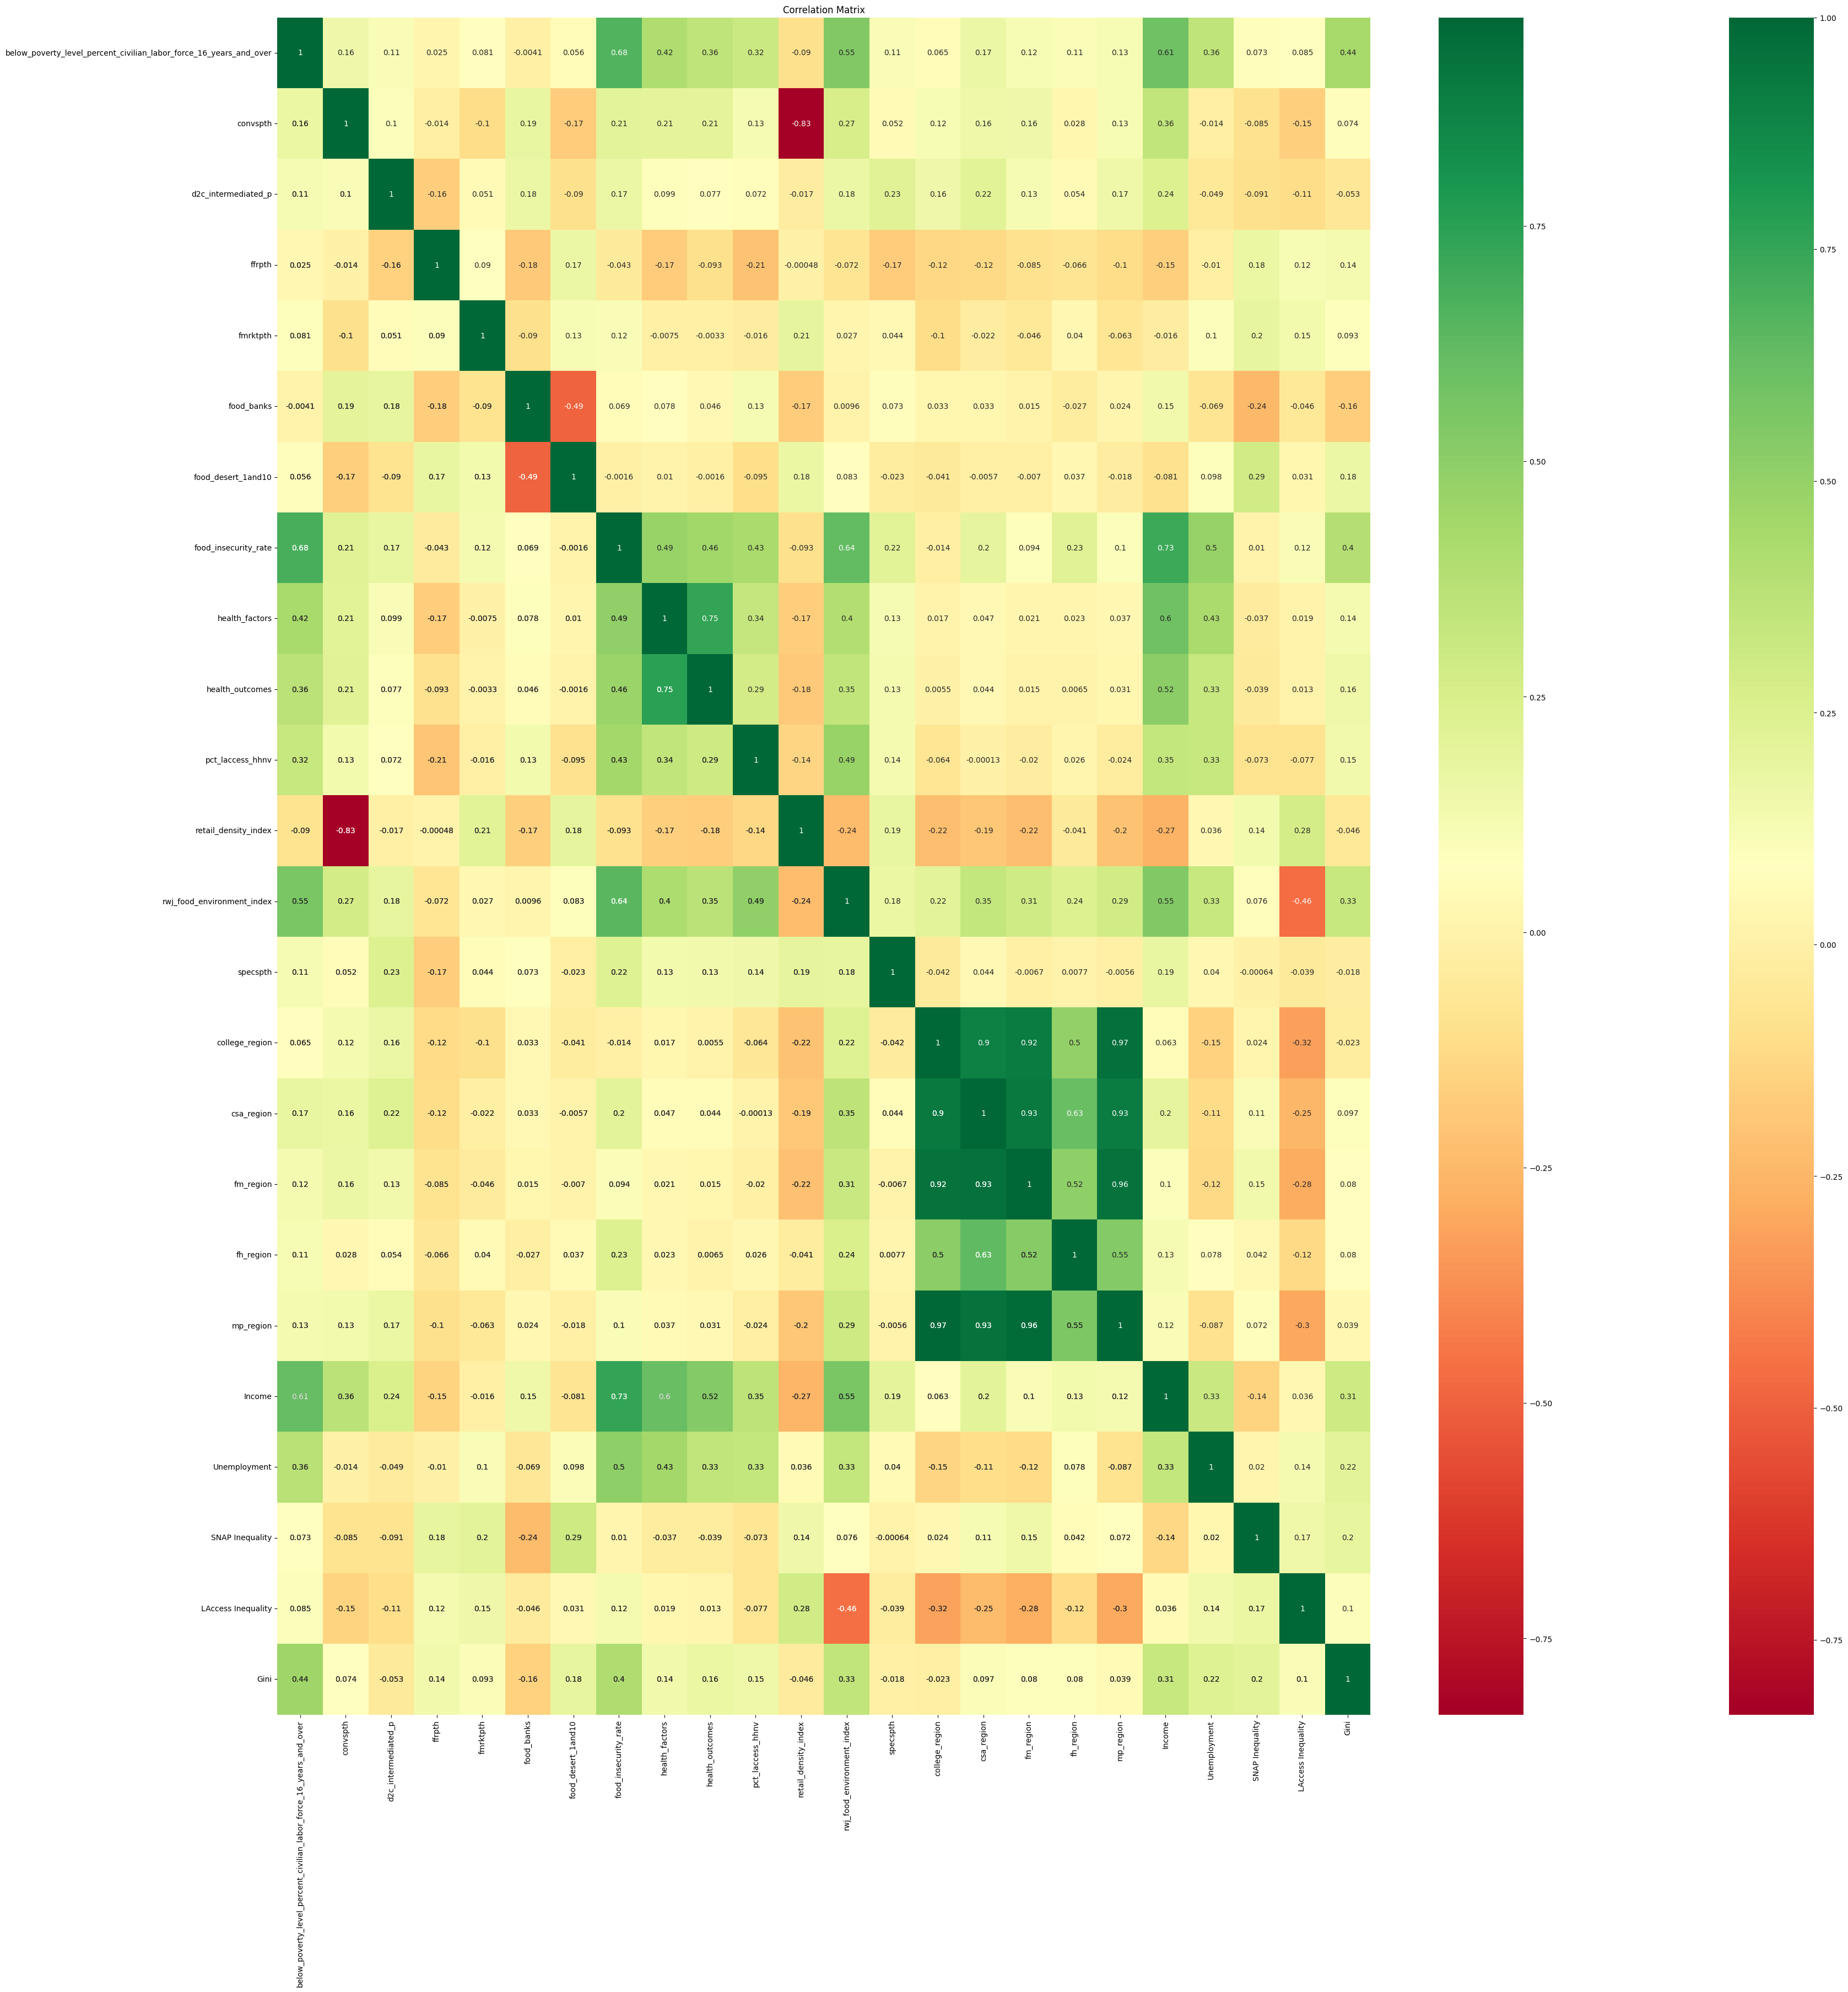

In [11]:
#plot the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
#Highlight positive correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask=mask)

plt.show()